In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import spatialdata as sd
import spatialdata_plot
import matplotlib.pyplot as plt
import pandas as pd

/home/voehring/voehring/projects/2023-01-15_spatial_data/spatialdata-env/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/home/voehring/voehring/projects/2023-01-15_spatial_data/spatialdata-env/lib/python3.9/site-packages/spatialdata/_compat.py:18: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  warnings.warn(


# `spatialdata_plot`: one to visualise them all 💍

## Load data

* Codex
* IMC
* Merfish
* Mibi-TOF
* Visium

In [3]:
codex = sd.read_zarr('/home/voehring/voehring/projects/2023-01-15_spatial_data/codex_all.zarr')

no parent found for <ome_zarr.reader.Label object at 0x7fa97cdb0670>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa97cd3e2b0>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa97cd47a90>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa97cd536d0>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa97cd5df70>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa97cd69bb0>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa97ccf5490>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa97ccff0d0>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa97cd534f0>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa97cd82850>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa97ceb3b20>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa97cdc8310>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa97cef5550>: None
no parent found for <ome_

In [4]:
codex_channels = ['Hoechst', 'BCL6', 'CD103', 'Myc', 'CD39', 'pSTAT3', 'CD70', 'GATA3',
       'CXCR5', 'Tbet', 'CD62L', 'FOXP3', 'CD163', 'CD194', 'Ki67', 'TIM3',
       'PAX5', 'CD134', 'IL10', 'CD5', 'CD206', 'CD25', 'CD16', 'CTLA4',
       'CD79a', 'CD57', 'CD34', 'CXCL13', 'CD21', 'CD7', 'PDPN', 'PD1',
       'HLA-DR', 'LAG3', 'CD20', 'CD56', 'CD45RO', 'ICOS', 'CD90', 'CD4',
       'CD11c', 'CD3', 'CD68', 'CD69', 'CD14', 'CD8', 'kappa', 'CD45RA',
       'CD11b', 'GRZB', 'CD31', 'CD45', 'CD38', 'CD44', 'CD15', 'lambda',
       'MCT', 'DRAQ5']

In [5]:
merfish = sd.read_zarr('/home/voehring/voehring/projects/2023-01-15_spatial_data/merfish.zarr')

In [6]:
mibi = sd.read_zarr('/home/voehring/voehring/projects/2023-01-15_spatial_data/mibi.zarr')

no parent found for <ome_zarr.reader.Label object at 0x7fa922d4d850>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa922d53b20>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa922d5a760>: None


In [7]:
imc = sd.read_zarr('/home/voehring/voehring/projects/2023-01-15_spatial_data/stein_new.zarr')

no parent found for <ome_zarr.reader.Label object at 0x7fa922c71ee0>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa922c60790>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa922c9ab50>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa922c262b0>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa922c9ad30>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa922c33af0>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa922c41400>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa922c49430>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa922c4ed00>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa922c4ee80>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa922c5f430>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa9211c5be0>: None
no parent found for <ome_zarr.reader.Label object at 0x7fa922c49190>: None
no parent found for <ome_

In [8]:
visium  = sd.read_zarr('/home/voehring/voehring/projects/2023-01-15_spatial_data/visium.zarr')

/home/voehring/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


## Overview - Principles

* `spatialdata_plotting` extends `spatialdata` with extensive plotting capabilities


### Preprocessing `spatialdata_plotting.pp`


* slicing and dicing -> always returns a `spatialdata` object with the selection, should be called before plotting
    * `get_images`: select images
    * `get_channels`: select channels
    * `get_bb`: select bounding box
* rendering labels, points, polygons
    * `render_labels`: overlays the segmentation mask of an image


### Plotting `spatialdata_plotting.pl`

* implements everything related to plotting 
    * `imshow`
    * `scatter`
    * `bar`


## Slicing and dicing

### `spatialdata_plotting.pp.get_images`

* We consider the MIBI dataset which contains 3 images `point8`, `point16`, `point23`.

In [9]:
mibi

SpatialData object with:
├── Images
│     ├── 'point16': SpatialImage[cyx] (3, 1024, 1024)
│     ├── 'point23': SpatialImage[cyx] (3, 1024, 1024)
│     └── 'point8': SpatialImage[cyx] (3, 1024, 1024)
├── Labels
│     ├── 'point16': SpatialImage[yx] (1024, 1024)
│     ├── 'point23': SpatialImage[yx] (1024, 1024)
│     └── 'point8': SpatialImage[yx] (1024, 1024)
└── Table
      └── 'AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial'': AnnData (3309, 36)

* `spatial_plotting.pp.get_image` selects a subset of images and returns a new `spatialdata` object
    * the returned `spatialdata` by default drops all labels not associated to the image selection
    * TODO: if the `label` name does not match name with the `image` a function may be provided (?)
    * TODO: `spatial_plotting.pp.get_image` should also subselect `table`, `points`, `polygons` etc.

In [10]:
mibi.pp.get_images('point16')

SpatialData object with:
├── Images
│     └── 'point16': SpatialImage[cyx] (3, 1024, 1024)
├── Labels
│     └── 'point16': SpatialImage[yx] (1024, 1024)
└── Table
      └── 'AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial'': AnnData (3309, 36)

In [11]:
mibi.pp.get_images(['point16', 'point23'])

SpatialData object with:
├── Images
│     ├── 'point16': SpatialImage[cyx] (3, 1024, 1024)
│     └── 'point23': SpatialImage[cyx] (3, 1024, 1024)
├── Labels
│     ├── 'point16': SpatialImage[yx] (1024, 1024)
│     └── 'point23': SpatialImage[yx] (1024, 1024)
└── Table
      └── 'AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial'': AnnData (3309, 36)

* in this example `label` and `image` do not match

In [12]:
imc

SpatialData object with:
├── Images
│     ├── 'Patient1_001': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient1_002': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient1_003': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient2_001': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient2_002': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient2_003': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient2_004': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient3_001': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient3_002': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient3_003': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient4_005': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient4_006': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient4_007': SpatialImage[cyx] (40, 600, 600)
│     └── 'Patient4_008': SpatialImage[cyx] (40, 600, 600)
├── Labels
│     ├── 'Patient1_001_deepcell': SpatialImage[yx] (600, 600)
│     ├── 'Patient1_001_ilastik': SpatialImage[yx] (600, 600)
│ 

In [13]:
imc.pp.get_images(['Patient2_002', 'Patient2_001'])

SpatialData object with:
├── Images
│     ├── 'Patient2_001': SpatialImage[cyx] (40, 600, 600)
│     └── 'Patient2_002': SpatialImage[cyx] (40, 600, 600)
└── Table
      └── 'AnnData object with n_obs × n_vars = 47859 × 40
    obs: 'Image', 'area', 'centroid-0', 'centroid-1', 'axis_major_length', 'axis_minor_length', 'eccentricity', 'image', 'image_width_px', 'image_height_px', 'image_num_channels', 'image_source_file', 'image_recovery_file', 'image_recovered', 'image_acquisition_id', 'image_acquisition_description', 'image_acquisition_start_x_um', 'image_acquisition_start_y_um', 'image_acquisition_end_x_um', 'image_acquisition_end_y_um', 'image_acquisition_width_um', 'image_acquisition_height_um', 'cell_id', 'library_id'
    var: 'channel', 'name', 'keep', 'ilastik', 'deepcell', 'Tube Number', 'Target', 'Antibody Clone', 'Stock Concentration', 'Final Concentration / Dilution', 'uL to add'
    uns: 'spatialdata_attrs'': AnnData (47859, 40)

### `spatialdata_plotting.pp.get_bb`
* `spatialdata_plotting.pp.get_bb` crops the desired parts of the image by iterating over all images and labels
    * TODO: How to handle out of range cases (?)


In [14]:
mibi.pp.get_bb(slice(200, 400), slice(200, 400))

SpatialData object with:
├── Images
│     ├── 'point16': SpatialImage[cyx] (3, 200, 200)
│     ├── 'point23': SpatialImage[cyx] (3, 200, 200)
│     └── 'point8': SpatialImage[cyx] (3, 200, 200)
├── Labels
│     ├── 'point16': SpatialImage[yx] (200, 200)
│     ├── 'point23': SpatialImage[yx] (200, 200)
│     └── 'point8': SpatialImage[yx] (200, 200)
└── Table
      └── 'AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial'': AnnData (3309, 36)

### `spatialdata_plotting.pp.get_channels`
* `spatialdata_plotting.pp.get_bb` selects channels
    * TODO: How to handle out of range cases (?)

In [15]:
imc.pp.get_channels([4, 6, 7])

SpatialData object with:
├── Images
│     ├── 'Patient1_001': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient1_002': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient1_003': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient2_001': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient2_002': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient2_003': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient2_004': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient3_001': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient3_002': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient3_003': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient4_005': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient4_006': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient4_007': SpatialImage[cyx] (3, 600, 600)
│     └── 'Patient4_008': SpatialImage[cyx] (3, 600, 600)
├── Labels
│     ├── 'Patient1_001_deepcell': SpatialImage[yx] (600, 600)
│     ├── 'Patient1_001_ilastik': SpatialImage[yx] (600, 600)
│     ├── 'Patie

## Chaining

* `spatialdata_plotting.pp` subsetting functions (`pp.get_images`, `pp.get_channels`, `pp.get_bb`) are meant to be used in conjunction and are order invariant

In [16]:
(mibi
 .pp.get_images(['point16', 'point8'])
 .pp.get_channels([1, 2])
 .pp.get_bb(slice(200, 400), slice(400, 600))
)

SpatialData object with:
├── Images
│     ├── 'point16': SpatialImage[cyx] (2, 200, 200)
│     └── 'point8': SpatialImage[cyx] (2, 200, 200)
├── Labels
│     ├── 'point16': SpatialImage[yx] (200, 200)
│     └── 'point8': SpatialImage[yx] (200, 200)
└── Table
      └── 'AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial'': AnnData (3309, 36)

In [17]:
(codex
 .pp.get_images(['191_1_00', '191_1_01', '191_1_30'])
 .pp.get_bb(slice(1000, 1500), slice(1000, 1500))
 .pp.get_channels([4, 5, 7, 19])
)

SpatialData object with:
├── Images
│     ├── '191_1_00': SpatialImage[cyx] (4, 500, 500)
│     ├── '191_1_01': SpatialImage[cyx] (4, 500, 500)
│     └── '191_1_30': SpatialImage[cyx] (4, 500, 500)
├── Labels
│     ├── '191_1_00': SpatialImage[yx] (500, 500)
│     ├── '191_1_01': SpatialImage[yx] (500, 500)
│     └── '191_1_30': SpatialImage[yx] (500, 500)
└── Table
      └── 'AnnData object with n_obs × n_vars = 6158123 × 58
    obs: 'id', 'x', 'y', 'size', 'ellipse', 'cx', 'cy', 'major', 'minor', 'angle', 'top', 'bottom', 'left', 'right', 'border', 'cell', 'label', 'num', 'name', 'origin', 'library_id', 'color'
    uns: 'spatialdata_attrs'': AnnData (6158123, 58)

## Colorizing

* Intended to be used with raw spatial proteomics data such as CODEX, IMC etc.
    * Performs quantile normalisation and colors the image according to specified colors
    * The returned `spatialdata` object contains colorized images in the `images` slot

In [18]:
idx = [ i for i, c in enumerate(codex_channels) if c in ['CD4', 'CD8', 'PAX5'] ] 

(codex
 .pp.get_images(['191_1_00', '191_1_01', '191_1_30'])
 .pp.get_bb(slice(1000, 1500), slice(1000, 1500))
 .pp.get_channels(idx)
 .pp.colorize(colors=['green', 'blue', 'red'])
)

INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         


SpatialData object with:
├── Images
│     ├── '191_1_00': SpatialImage[cyx] (4, 500, 500)
│     ├── '191_1_01': SpatialImage[cyx] (4, 500, 500)
│     └── '191_1_30': SpatialImage[cyx] (4, 500, 500)
├── Labels
│     ├── '191_1_00': SpatialImage[yx] (500, 500)
│     ├── '191_1_01': SpatialImage[yx] (500, 500)
│     └── '191_1_30': SpatialImage[yx] (500, 500)
└── Table
      └── 'AnnData object with n_obs × n_vars = 6158123 × 58
    obs: 'id', 'x', 'y', 'size', 'ellipse', 'cx', 'cy', 'major', 'minor', 'angle', 'top', 'bottom', 'left', 'right', 'border', 'cell', 'label', 'num', 'name', 'origin', 'library_id', 'color'
    uns: 'spatialdata_attrs'': AnnData (6158123, 58)

## Render segmentation

* overlays a segmentation mask onto a image

In [9]:
idx = [ i for i, c in enumerate(codex_channels) if c in ['CD4', 'CD8', 'PAX5'] ] 

(codex
 .pp.get_images(['191_1_00', '191_1_01', '191_1_30'])
 .pp.get_bb(slice(1000, 1500), slice(1000, 1500))
 .pp.get_channels(idx)
 .pp.colorize(colors=['green', 'blue', 'red'])
 .pp.render_labels()
)

INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         


SpatialData object with:
├── Images
│     ├── '191_1_00': SpatialImage[cyx] (4, 500, 500)
│     ├── '191_1_01': SpatialImage[cyx] (4, 500, 500)
│     └── '191_1_30': SpatialImage[cyx] (4, 500, 500)
├── Labels
│     ├── '191_1_00': SpatialImage[yx] (500, 500)
│     ├── '191_1_01': SpatialImage[yx] (500, 500)
│     └── '191_1_30': SpatialImage[yx] (500, 500)
└── Table
      └── 'AnnData object with n_obs × n_vars = 6158123 × 58
    obs: 'id', 'x', 'y', 'size', 'ellipse', 'cx', 'cy', 'major', 'minor', 'angle', 'top', 'bottom', 'left', 'right', 'border', 'cell', 'label', 'num', 'name', 'origin', 'library_id', 'color'
    uns: 'spatialdata_attrs'': AnnData (6158123, 58)

## Plotting

* By default `splatialdata_plotting.pl.imshow`, creates a raster of all images available in the `spatialdata` object

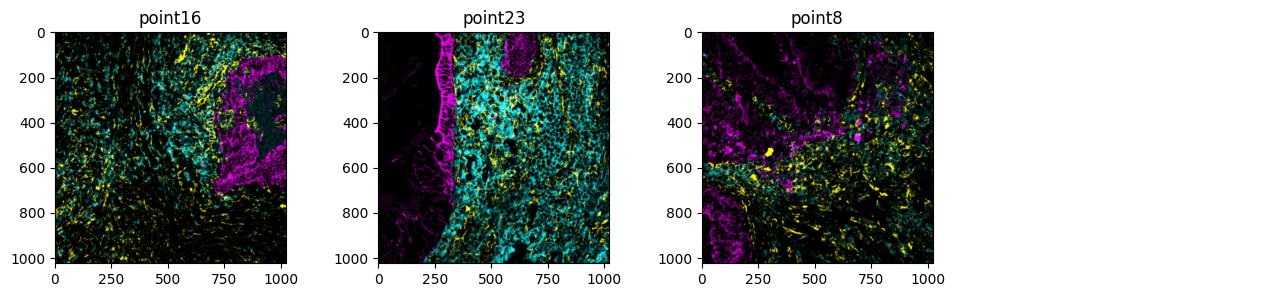

In [23]:
_ = mibi.pl.imshow()

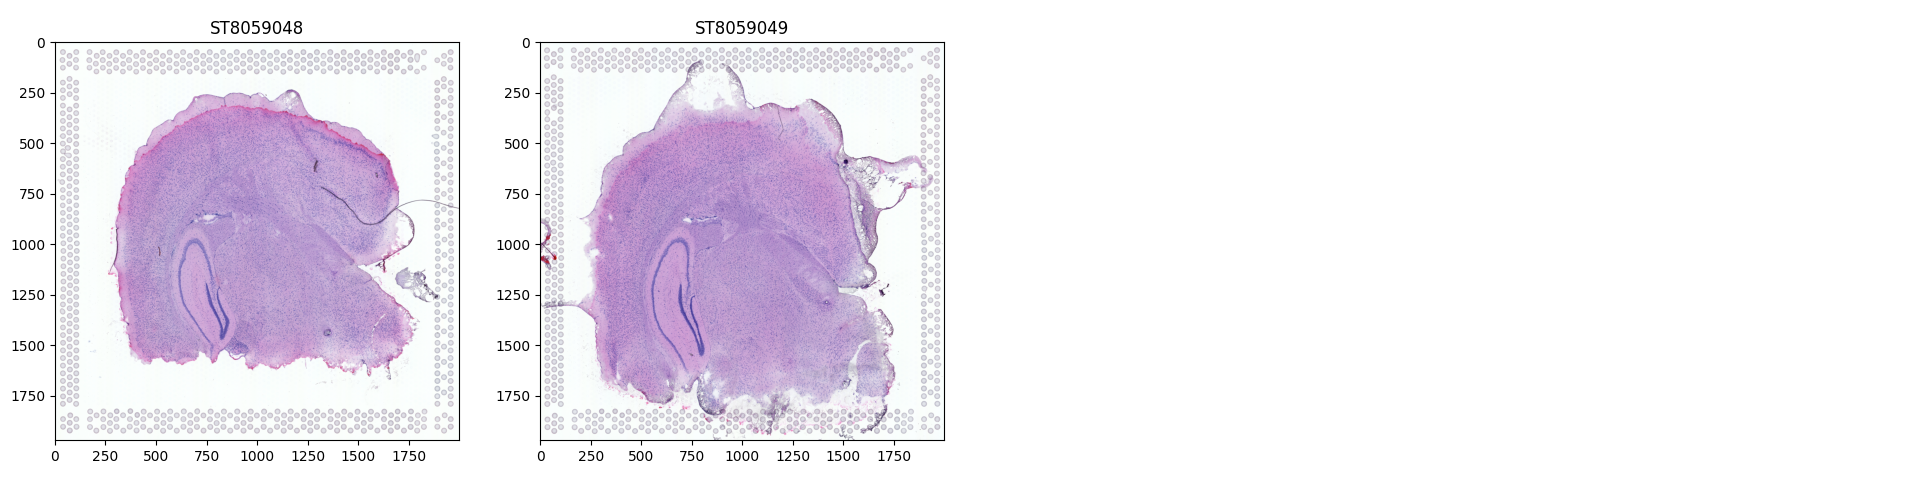

In [27]:
_ = (visium
     .pl.imshow(width=6, height=6)
     
    )

INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                              

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

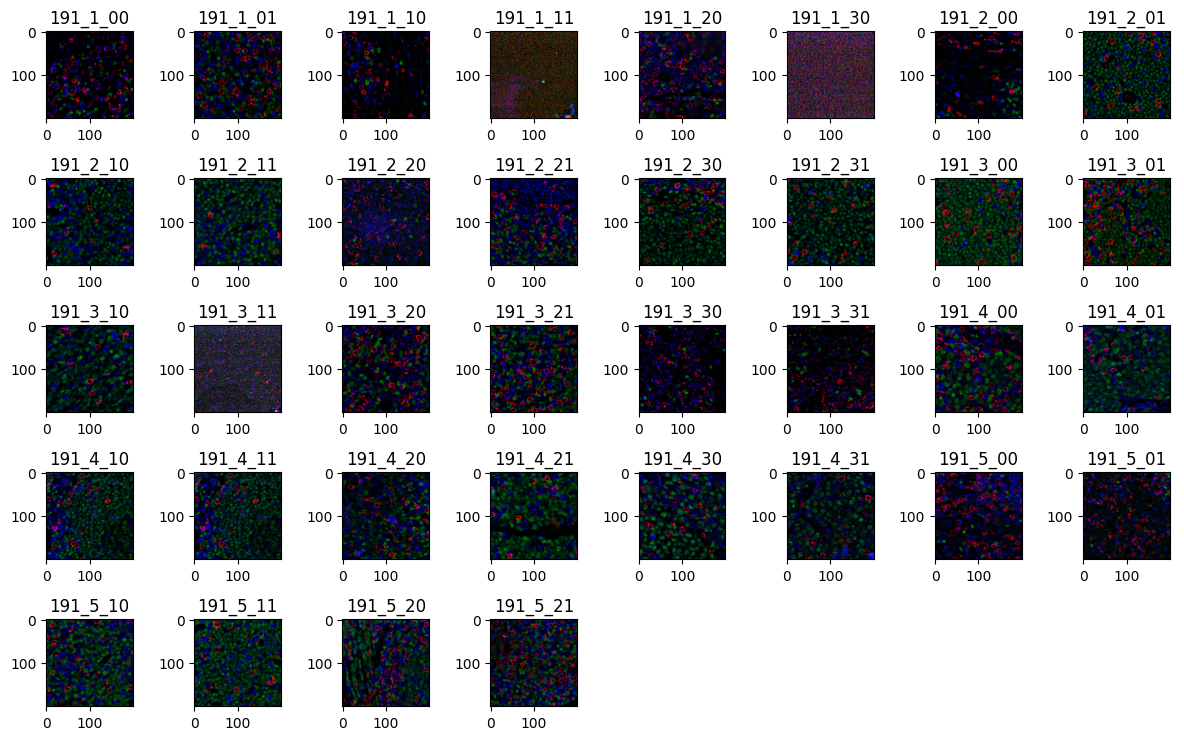

In [31]:
idx = [ i for i, c in enumerate(codex_channels) if c in ['CD4', 'CD8', 'PAX5'] ] 

_ = (codex
     .pp.get_bb(slice(500, 700), slice(500, 700))
     .pp.get_channels(idx)
     .pp.colorize(colors=['green', 'blue', 'red'])
     .pl.imshow(width=1.5, height=1.5, ncols=8)
)
plt.tight_layout()

INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


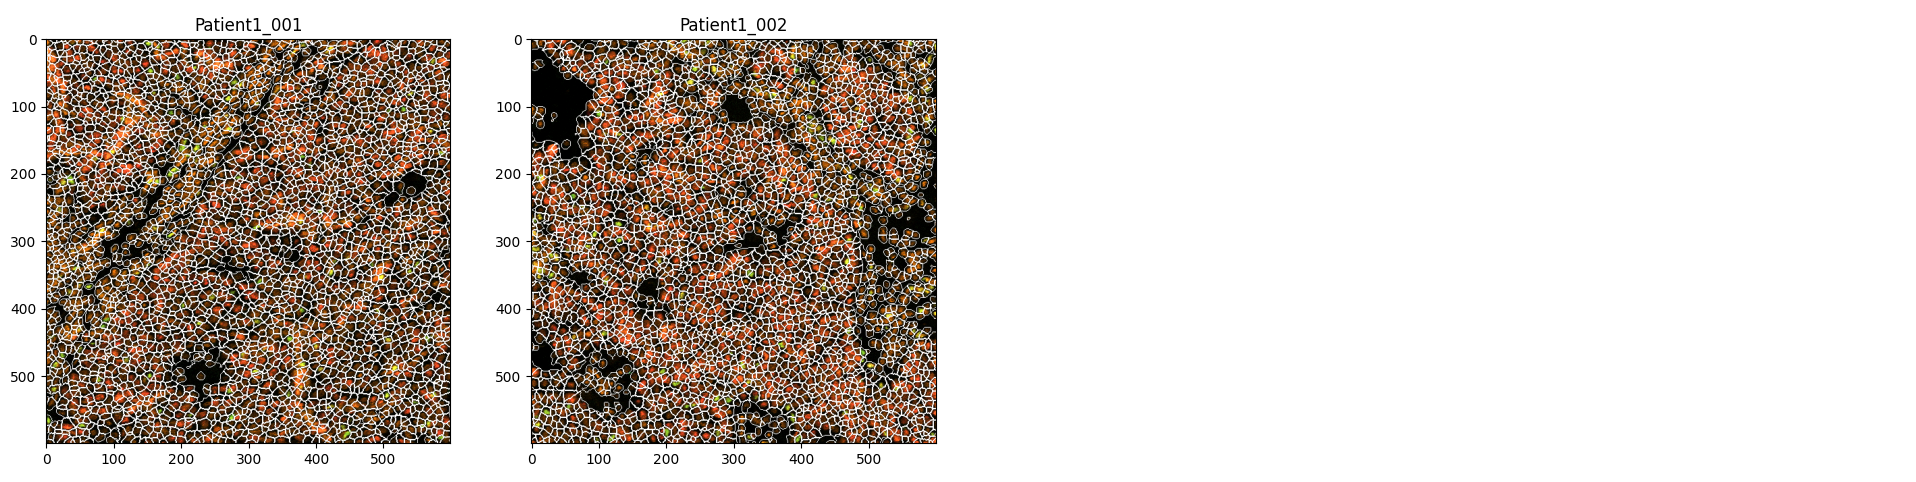

In [10]:
idx = [ i for i, c, in enumerate(imc.table.var.index.tolist()) if c in ['DNA1', 'FOXP3', 'Ki67']]
_= (imc
    .pp.get_images(['Patient1_001', 'Patient1_002'], label_func=lambda x: x.rstrip('_ilastik'))
    .pp.get_channels(idx)
    .pp.colorize(colors=['C2', 'C3', 'C1'])
    .pp.render_labels(label_func=lambda x: x + '_ilastik') # we need a better solution for that
    .pl.imshow(width=6, height=6)
)

INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


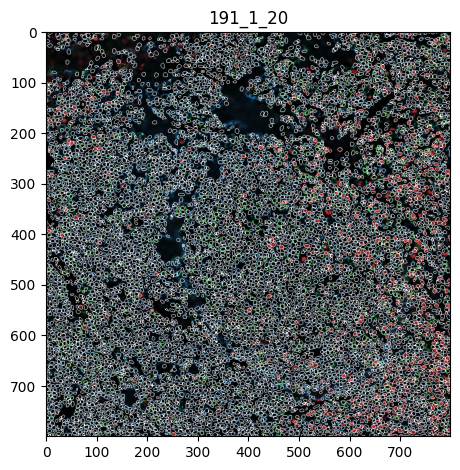

In [55]:

idx = [ i for i, c in enumerate(codex_channels) if c in ['CD4', 'CD8', 'PAX5'] ] 

_ = (codex
     .pp.get_images(['191_1_20'])
     .pp.get_bb(slice(700, 1500), slice(700, 1500))
     .pp.get_channels(idx)
     .pp.colorize(colors=['C3', 'C0', 'C2'])
     .pp.render_segmentation()
     .pl.imshow(width=12, height=12)
)
plt.tight_layout()

In [44]:
codex

SpatialData object with:
├── Images
│     ├── '191_1_00': SpatialImage[cyx] (58, 3750, 4998)
│     ├── '191_1_01': SpatialImage[cyx] (58, 3750, 4998)
│     ├── '191_1_10': SpatialImage[cyx] (58, 3750, 4998)
│     ├── '191_1_11': SpatialImage[cyx] (58, 3750, 4998)
│     ├── '191_1_20': SpatialImage[cyx] (58, 3750, 4998)
│     ├── '191_1_30': SpatialImage[cyx] (58, 3750, 4998)
│     ├── '191_2_00': SpatialImage[cyx] (58, 3750, 4998)
│     ├── '191_2_01': SpatialImage[cyx] (58, 3750, 4998)
│     ├── '191_2_10': SpatialImage[cyx] (58, 3750, 4998)
│     ├── '191_2_11': SpatialImage[cyx] (58, 3750, 4998)
│     ├── '191_2_20': SpatialImage[cyx] (58, 3750, 4998)
│     ├── '191_2_21': SpatialImage[cyx] (58, 3750, 4998)
│     ├── '191_2_30': SpatialImage[cyx] (58, 3750, 4998)
│     ├── '191_2_31': SpatialImage[cyx] (58, 3750, 4998)
│     ├── '191_3_00': SpatialImage[cyx] (58, 3750, 4998)
│     ├── '191_3_01': SpatialImage[cyx] (58, 3750, 4998)
│     ├── '191_3_10': SpatialImage[cyx] (58, 3750, 4

[24, 29, 32]

INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                              

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

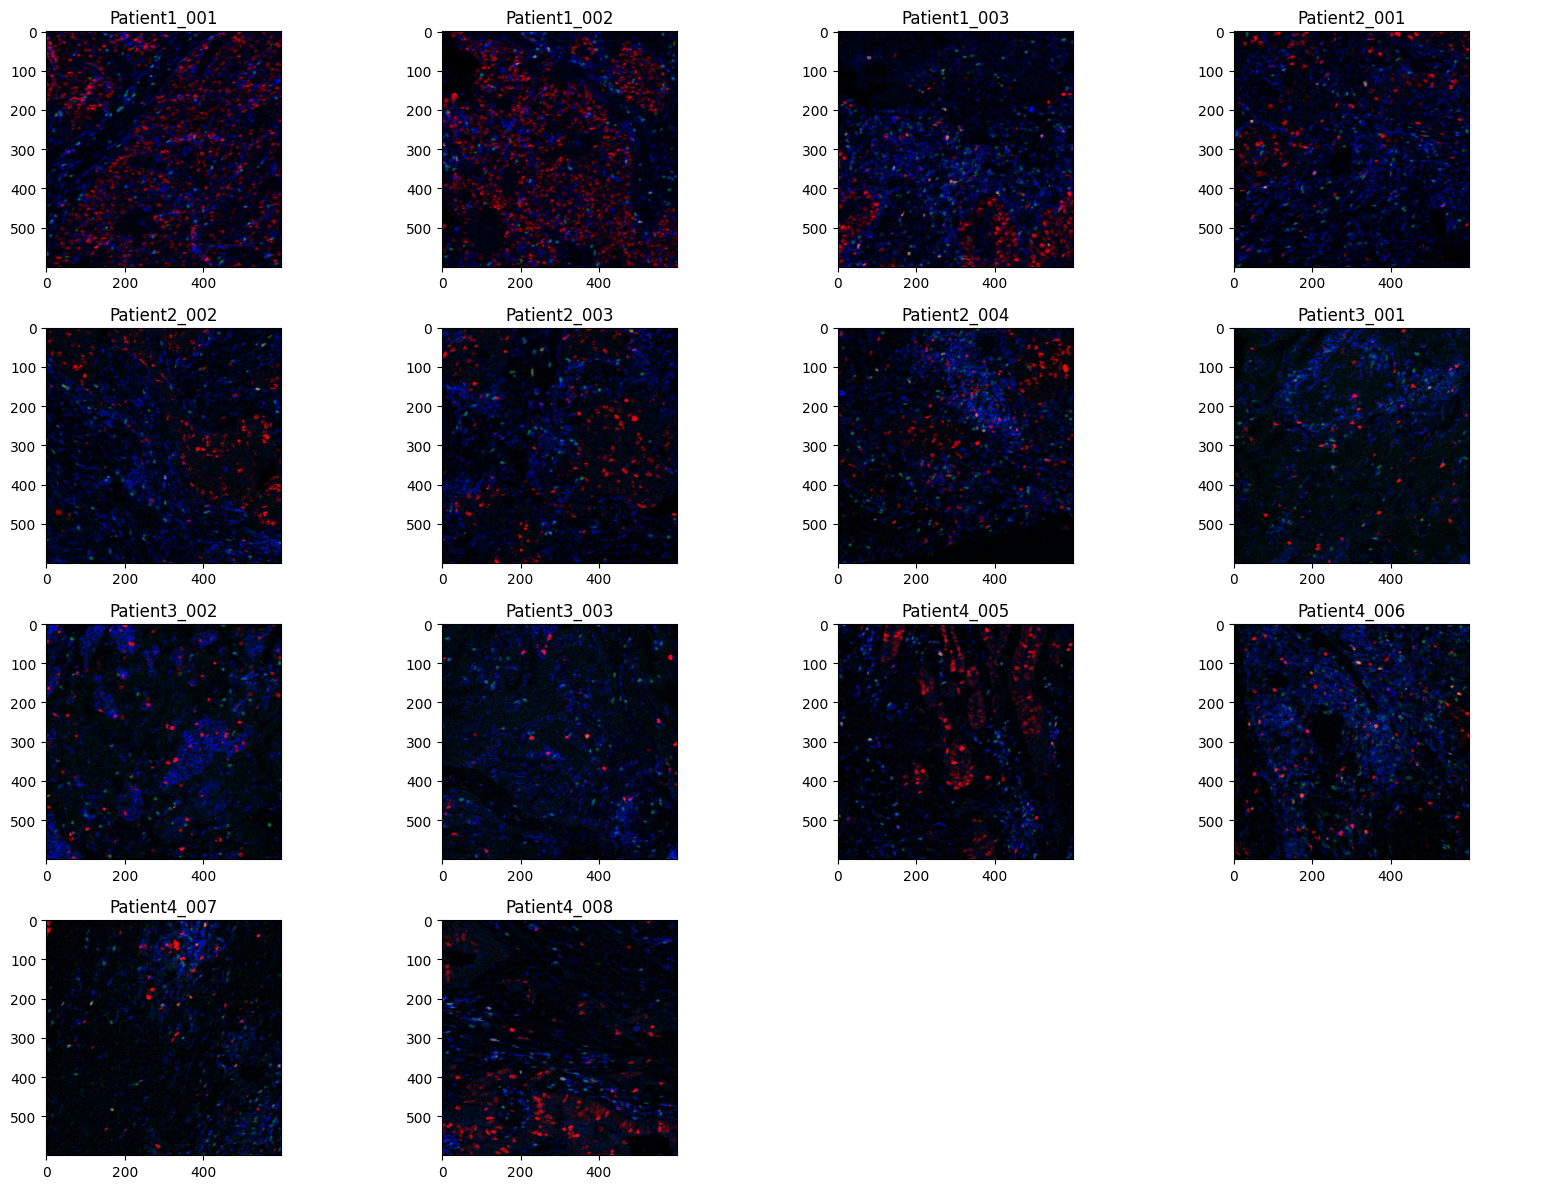

In [29]:
idx = [ i for i, c, in enumerate(stein.table.var.index.tolist()) if c in ['CD4', 'FOXP3', 'Ki67']]
_ = (stein
 .pp.get_channels(idx)
 .pp.colorize(colors=['green', 'red', 'blue'])
 .pl.imshow()
)
plt.tight_layout()

In [20]:
stein

NameError: name 'stein' is not defined

INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                              

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

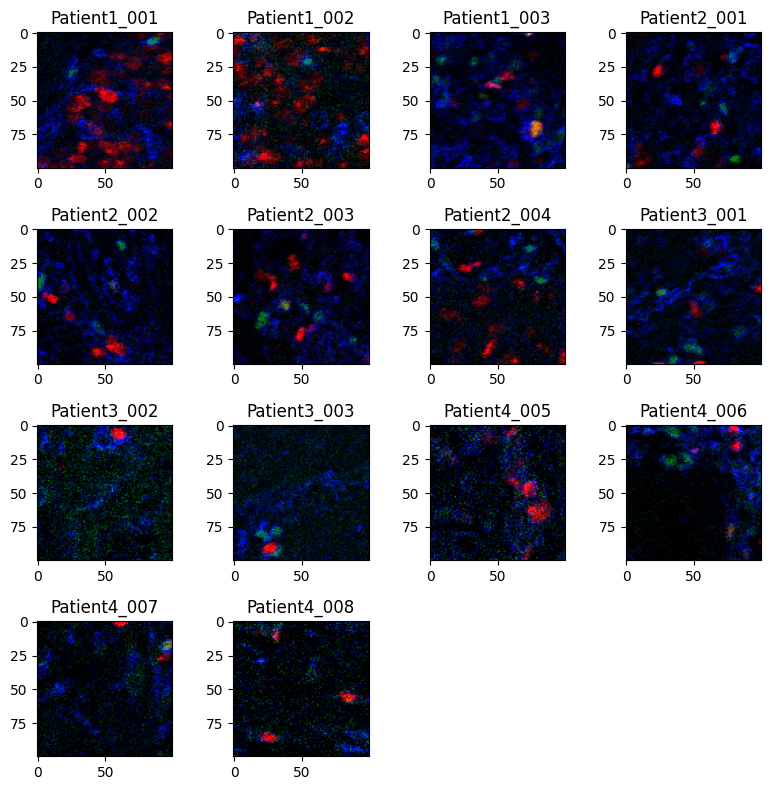

In [31]:
idx = [ i for i, c, in enumerate(stein.table.var.index.tolist()) if c in ['CD4', 'FOXP3', 'Ki67']]
_ = (stein
 .pp.get_channels(idx)
 .pp.get_bb(slice(200, 300), slice(200, 300))
 .pp.colorize(colors=['green', 'red', 'blue'])
 .pl.imshow(height=2, width=2)
)
plt.tight_layout()

# Merfish

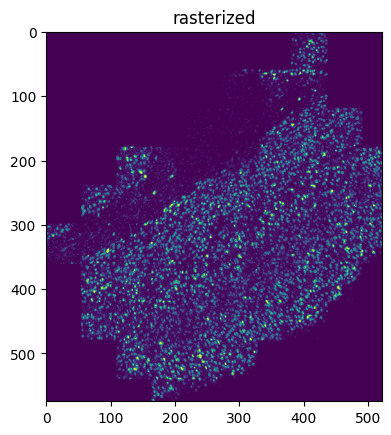

In [26]:
_ = merfish.pl.imshow()

/g/huber/users/voehring/projects/2023-01-15_spatial_data/spatialdata-plot/src/spatialdata_plot/pl/basic.py:8: AccessorRegistrationWarning: registration of accessor <class 'spatialdata_plot.pl.basic.PlotAccessor'> under name 'pl' for type <class 'spatialdata._core._spatialdata.SpatialData'> is overriding a preexisting attribute with the same name.
  class PlotAccessor:
/g/huber/users/voehring/projects/2023-01-15_spatial_data/spatialdata-plot/src/spatialdata_plot/pp/basic.py:13: AccessorRegistrationWarning: registration of accessor <class 'spatialdata_plot.pp.basic.PreprocessingAccessor'> under name 'pp' for type <class 'spatialdata._core._spatialdata.SpatialData'> is overriding a preexisting attribute with the same name.
  self._sdata = sdata


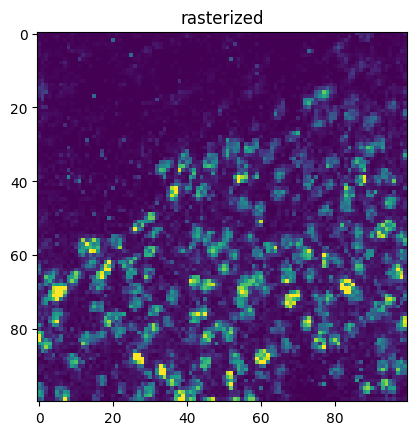

In [27]:
_ = (merfish
     .pp.get_bb(slice(200, 300), slice(200, 300))
     .pl.imshow()
)

# CODEX

/g/huber/users/voehring/projects/2023-01-15_spatial_data/spatialdata-plot/src/spatialdata_plot/pp/basic.py:13: AccessorRegistrationWarning: registration of accessor <class 'spatialdata_plot.pp.basic.PreprocessingAccessor'> under name 'pp' for type <class 'spatialdata._core._spatialdata.SpatialData'> is overriding a preexisting attribute with the same name.
  self._sdata = sdata


In [34]:
idx = [ i for i, c in enumerate(channels) if c in ['CD4', 'CD8', 'PAX5'] ] 